In [123]:
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from src.helpers.plotters import plot_corr_matrix

In [124]:
df_dropped = pd.read_csv('../cleaned/output_ebay_dropped.csv')
df_dropped.head()

,price_pln,handheld,home_console,generation,seller_num_comments,seller_rating,condition_num,seller_score,collectible
0,327.48,0,1,6,1078,99.9,1,0.736873,0
1,286.38,0,1,6,280,100.0,1,0.692709,0
2,511.71,0,1,6,107,100.0,1,0.660797,0
3,532.18,0,1,6,108,100.0,1,0.661105,0
4,286.58,0,1,6,67,100.0,1,0.645358,0


In [125]:
df_encoded = pd.read_csv('../cleaned/output_ebay_encoded.csv')
df_encoded.head()

,condition,country,model,sale_date,title,price_pln,producer,model_group,handheld,home_console,generation,seller_name,seller_num_comments,seller_rating,region,condition_num,seller_score,collectible
0,4,47,59,390,92398,327.48,0,21,0,1,6,17903,1078,99.9,0,1,0.736873,0
1,4,47,59,390,90407,286.38,0,21,0,1,6,7670,280,100.0,0,1,0.692709,0
2,4,47,59,390,92394,511.71,0,21,0,1,6,32239,107,100.0,0,1,0.660797,0
3,4,47,59,390,92502,532.18,0,21,0,1,6,9028,108,100.0,0,1,0.661105,0
4,4,47,59,390,13319,286.58,0,21,0,1,6,15147,67,100.0,0,1,0.645358,0


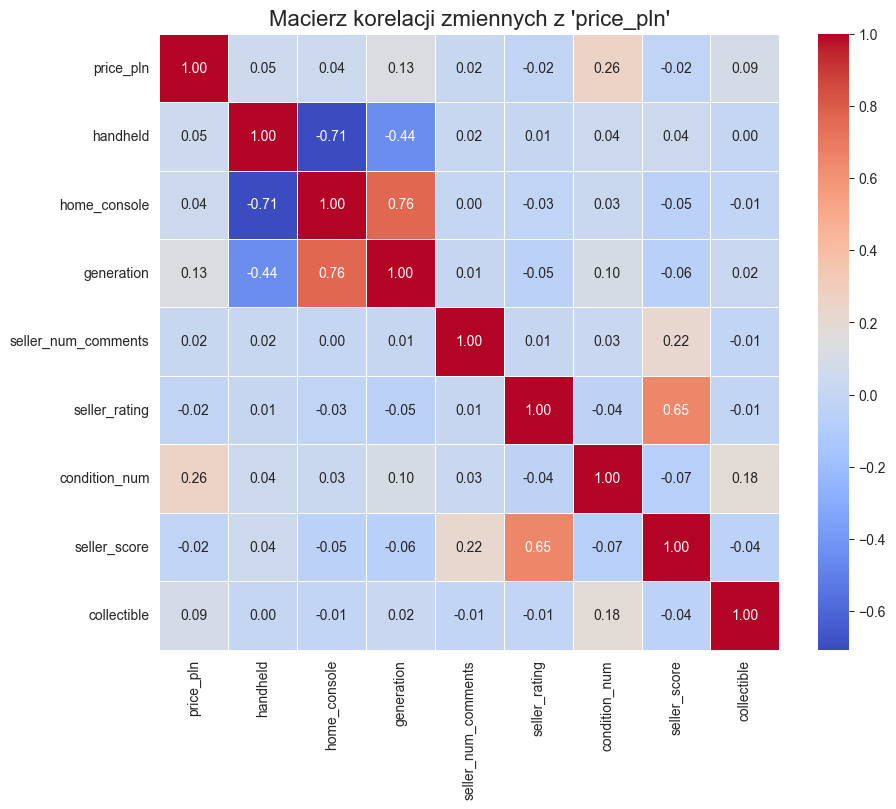

In [126]:
plot_corr_matrix(df_dropped)

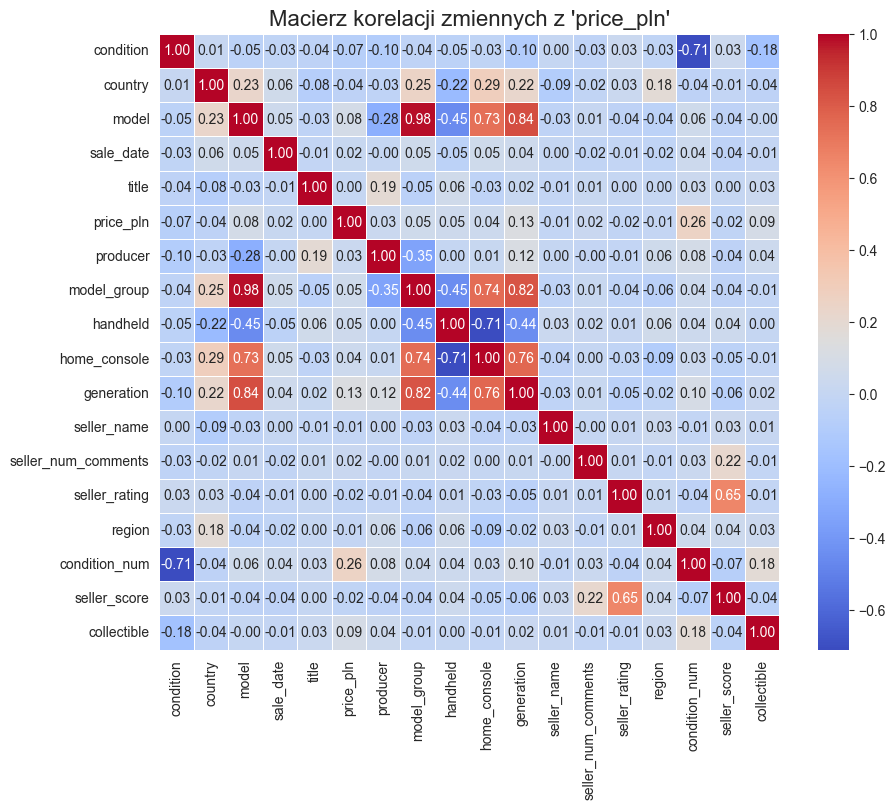

In [127]:
plot_corr_matrix(df_encoded)

In [128]:
y_dropped = df_dropped['price_pln']
X_dropped = df_dropped.drop(columns=['price_pln'])
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=42)


y_encoded = df_encoded['price_pln']
X_encoded = df_encoded.drop(columns=['price_pln'])
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

X_dropped.head()


,handheld,home_console,generation,seller_num_comments,seller_rating,condition_num,seller_score,collectible
0,0,1,6,1078,99.9,1,0.736873,0
1,0,1,6,280,100.0,1,0.692709,0
2,0,1,6,107,100.0,1,0.660797,0
3,0,1,6,108,100.0,1,0.661105,0
4,0,1,6,67,100.0,1,0.645358,0


In [129]:
ln = LinearRegression()
forward_dropped = SequentialFeatureSelector(
    ln,
    k_features=4,
    forward=True,
    verbose=1
)
back_dropped = SequentialFeatureSelector(
    ln,
    k_features=4,
    forward=False,
    verbose=1
)


sf_forward_dropped = forward_dropped.fit(X_dropped, y_dropped)
sf_back_dropped = back_dropped.fit(X_dropped, y_dropped)

Features: 4/4

In [130]:
feat_names = list(sf_forward_dropped.k_feature_names_)
print(feat_names)
print(sf_forward_dropped.k_feature_idx_)
print(sf_forward_dropped.k_score_)

['handheld', 'generation', 'condition_num', 'collectible']
(0, 2, 5, 7)
0.06922009381532387


In [131]:
feat_names = list(sf_back_dropped.k_feature_names_)
print(feat_names)

print(sf_back_dropped.k_feature_idx_)
print(sf_back_dropped.k_score_)

['handheld', 'generation', 'condition_num', 'collectible']
(0, 2, 5, 7)
0.06922009381532387


In [132]:
forward_encoded = SequentialFeatureSelector(
    ln,
    k_features=4,
    forward=True,
    verbose=1
)

back_encoded = SequentialFeatureSelector(
    ln,
    k_features=4,
    forward=False,
    verbose=1
)
sf_back_encoded = back_encoded.fit(X_encoded, y_encoded)
sf_forward_encoded = back_dropped.fit(X_encoded, y_encoded)

Features: 4/44

In [138]:
feat_names = list(sf_forward_encoded.k_feature_names_)
print(feat_names)

print(sf_forward_encoded.k_feature_idx_)
print(sf_forward_encoded.k_score_)

['condition', 'handheld', 'generation', 'condition_num']
(0, 7, 9, 14)
0.09314093017723128


In [139]:
feat_names = list(sf_back_encoded.k_feature_names_)
print(feat_names)

print(sf_back_encoded.k_feature_idx_)
print(sf_back_encoded.k_score_)

['condition', 'handheld', 'generation', 'condition_num']
(0, 7, 9, 14)
0.09314093017723128


In [140]:
import statsmodels.api as sm
regressor_OLS_dropped = sm.OLS(endog=y_train_dropped,exog=X_train_dropped[['handheld', 'generation', 'condition_num', 'collectible']]).fit()
regressor_OLS_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_pln   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                          9.276e+04
Date:                Sat, 25 Jan 2025   Prob (F-statistic):                        0.00
Time:                        22:16:08   Log-Likelihood:                     -1.0159e+06
No. Observations:              146706   AIC:                                  2.032e+06
Df Residuals:                  146702   BIC:                                  2.032e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
handheld        179.3849      1.240    144.617      0.000     176.954     181.816
generation       26.8727      0.142    189.727      0.000      26.595      27.150
condition_num   146.0579      0.787    185.705      0.000     144.516     147.599
collectible      34.9528      3.365     10.388      0.000      28.358      41.548
==============================================================================
Omnibus:                     2612.771   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5201.143
Skew:                           0.072   Prob(JB):                         0.00
Kurtosis:                       3.911   Cond. No.                         32.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
regressor_OLS_encoded = sm.OLS(endog=y_train_encoded,exog=X_train_encoded[['condition', 'handheld', 'generation', 'condition_num']]).fit()
regressor_OLS_encoded.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_pln   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                          1.249e+05
Date:                Sat, 25 Jan 2025   Prob (F-statistic):                        0.00
Time:                        22:16:11   Log-Likelihood:                     -9.9962e+05
No. Observations:              146706   AIC:                                  1.999e+06
Df Residuals:                  146702   BIC:                                  1.999e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
condition        52.8990      0.277    191.190      0.000      52.357      53.441
handheld         57.1205      1.280     44.619      0.000      54.611      59.630
generation        9.8498      0.155     63.624      0.000       9.546      10.153
condition_num   134.0850      0.695    193.059      0.000     132.724     135.446
==============================================================================
Omnibus:                     5476.977   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6095.015
Skew:                           0.497   Prob(JB):                         0.00
Kurtosis:                       2.900   Cond. No.                         15.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
regressor_pred_encoded = regressor_OLS_encoded.predict(X_test_encoded[['condition', 'handheld', 'generation', 'condition_num']])
regressor_pred_dropped = regressor_OLS_dropped.predict(X_test_dropped[['handheld', 'generation', 'condition_num', 'collectible']])

In [145]:
regressor_pred_encoded

119818    392.951898
125874    394.930130
121080    404.779918
77079     414.629707
74096     392.951898
             ...    
96329     392.951898
26574     404.779918
160419    424.479495
85780     404.779918
64297     335.831400
Length: 36677, dtype: float64

In [146]:
regressor_pred_dropped

119818    298.570035
125874    280.421471
121080    307.294191
77079     334.166912
74096     298.570035
             ...    
96329     298.570035
26574     307.294191
160419    361.039632
85780     307.294191
64297     119.185148
Length: 36677, dtype: float64